# Loan Approval Prediction

## Getting the system ready and loading the data

Without wasting any time we will directly begin with the data,
* So firstly, We will import the important librabries that we will need throught the analysis.
* We will read our train and test datasets and will merge the two data sets as our main target is to build a web    
  application so we won't require a test data set seperately instead we will use it to make our dataset bigger.
* After that for the sake of simplicity, we will simply drop rows with NA vaues. Also because it is better to have a  
  smaller dataset instead of a misleading dataset.

**Note** :- Some other possible ways for treating missing values are :-
* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode
* Prediction of missing values using machine learning algorithms

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('TrainData.csv')
dat = pd.read_csv('TestData.csv')

df = pd.concat([data, dat])
df = df.dropna()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Understanding the data

We have 12 independent variables and 1 target(dependent) variable, i.e. Loan_Status in the training dataset.We can see there are three formats of data types:
* **object:** Object format means variables are categorical. Categorical variables in our dataset are Loan_ID, Gender, Married, 
  Dependents, Education, Self_Employed, Property_Area, Loan_Status.
* **int64:** It represents the integer variables. ApplicantIncome is of this format.
* **float64:** It represents the variable that has some decimal values involved. They are also numerical

In [124]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


## Exploratory Data Analysis (EDA)
* **Univariate Analysis** :- "uni" means one, So this means the study of one variable
* **Bivariate and Multivariate Analysis** :- similarly "bi" means two and "multi" means many. These are basically used to find relationship between one or more variables.

### Univariate analysis using plot bars

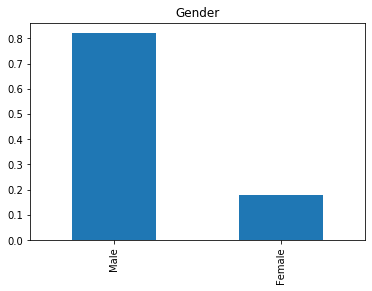

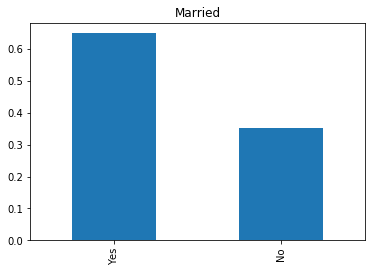

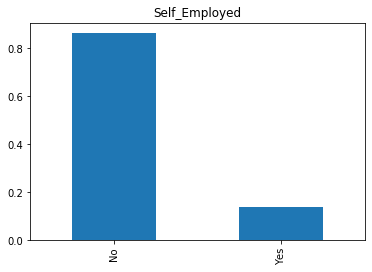

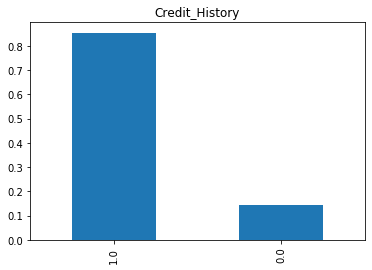

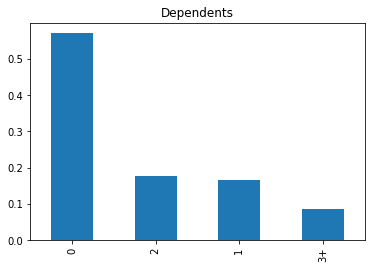

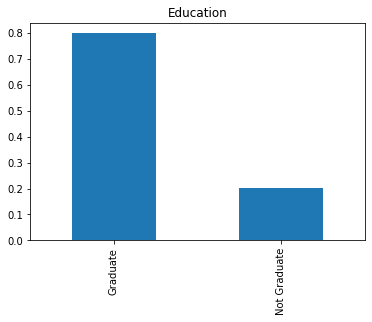

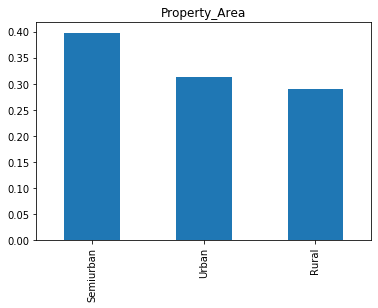

In [126]:
#Categorical variables
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()
#Ordinal variables
df['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
df['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

**So from above we can say that:**
* 80% of applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% of applicants in the dataset are self-employed.
* Around 85% of applicants have repaid their doubts.
* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from the Semiurban area.

similarly, we can do the univariate analysis for numerical values also using other plots as required

### Bivariate Analysis

Let’s recall some of the hypotheses that we have taken:
* Applicants with high incomes should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

Let’s try to test the above-mentioned hypotheses using bivariate analysis.
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

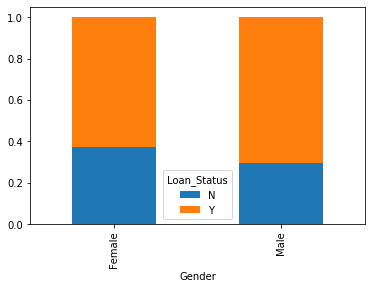

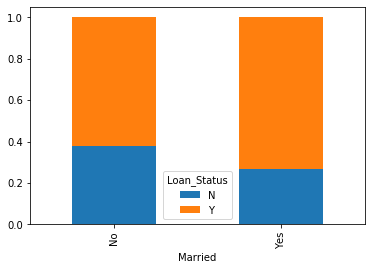

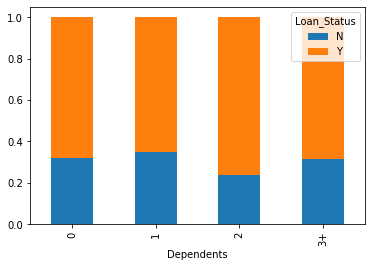

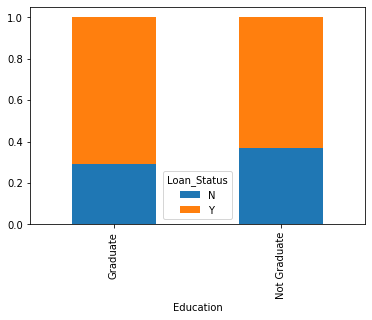

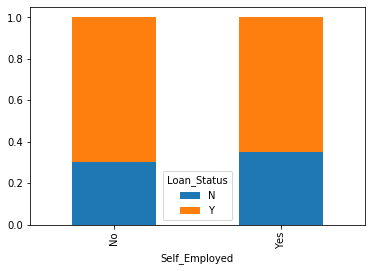

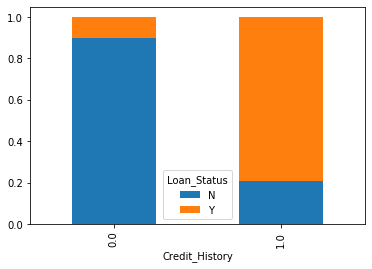

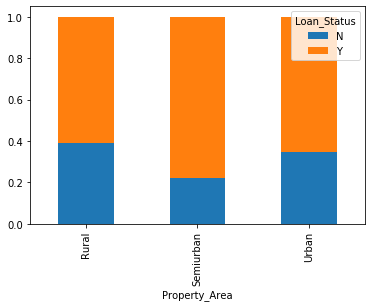

In [127]:
#categorical or ordinal variabes vs target variable
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

Married=pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()


**Results from the analysis :-**
* It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.
* The proportion of married applicants is higher for approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* It can be seen that non-graduated people are more likely to get unapproval for loans.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
* It seems people with a credit history as 1 are more likely to get their loans approved.
* The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

This is all about the categorical and ordinal variable vs target variable. Now, we will use **Heatmap** for the bivariate analysis of the numerical variables with respect to the target variable. Heatmaps are used to find correlations between the variable or features that can be positive or negative

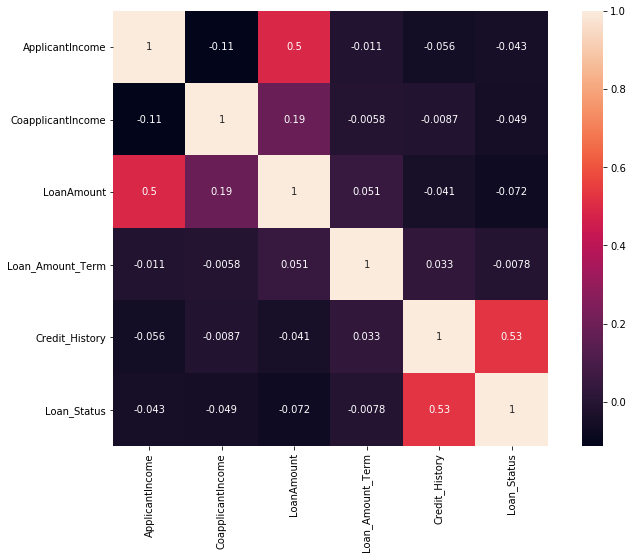

In [128]:
#numerical variable vs target variable
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
cormat=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].corr()
plt.subplots(figsize=(12,8))
sns.heatmap(cormat,square=True,annot = True)

**We see that the most correlate variables are (ApplicantIncome — LoanAmount) and (Credit_History — Loan_Status). LoanAmount is also correlated with CoapplicantIncome**.

## Model building & Machine learning part

**Before applying machine learning algorithm, we will firstly do the following step :-**
* we will make dummy variables for the categorical variables. The dummy variable turns categorical variables into a series of 0 and 1, making them a lot easier to quantify and compare. for this either we can use get_dummies() function or can simply use map function.
* Then we will select top 6-7 features that we will use in our model
* Then we will split our model into train and test set.
* And final we will apply the ML algorithm and check the accuracy of the model.


In [130]:
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Dependents'] = df['Dependents'].astype(np.int)
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype(np.int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int32  
 2   Married            480 non-null    int32  
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    int32  
 5   Self_Employed      480 non-null    int32  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int32  
 12  Loan_Status        480 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 39.4+ KB


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x=df[['Married','Education','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].values
y=df['Loan_Status'].values

X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

model = LogisticRegression()
model.fit(X_trainset, y_trainset)
LogisticRegression()

pred_cv = model.predict(X_testset)
accuracy_score(y_testset,pred_cv)

0.8055555555555556

## Feature Engineering
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:
* **Total Income** — As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan approval might also be high.
* **EMI** — EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of the loan amount with respect to the loan amount term.
* **Balance Income** — This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

**Now we will save our changed dataframe, so that we can directly use it on our project.**

In [174]:
df.to_excel("loan.xlsx")